# Notebook for loading and inspecting elements of heatmaps

Notebook just for compiling raw listed cell/event counter data as heatmaps

In [2]:
import csv, glob, re, os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
from tqdm import tqdm
import render
import calculate_radial_analysis as calculate

# exploring that bright yellow box hmmmm 800x800x20

### Load from previously compiles .npz stacks of N_cells, N_events, P_events

In [5]:
### load npz
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/canon_N_cell_N_event_P_event_800.800.20.npz') as data:
    N_cells = data['arr_0']
    N_events = data['arr_1']
    P_events = data['arr_2']
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/control_N_cell_N_event_P_event_800.800.20.npz') as data:
    N_cells_c = data['arr_0']
    N_events_c = data['arr_1']
    P_events_c = data['arr_2']
N_c = 10491
N = 1839
limit_c = np.amax(P_events_c)
limit = np.amax(P_events)
cbar_lim = tuple((0, max(limit_c, limit)))

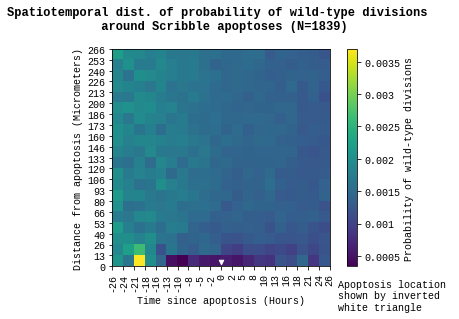

In [8]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

In [13]:
P_events[0,2] 

0.0036991368680641184

In [14]:
P_events[0,:]

array([0.002079  , 0.00165563, 0.00369914, 0.00199402, 0.00144196,
       0.00047081, 0.0003391 , 0.00074331, 0.00058219, 0.00054563,
       0.00061033, 0.00052304, 0.00070242, 0.00089029, 0.00083432,
       0.0012118 , 0.00113   , 0.00144212, 0.00087116, 0.00126152])

In [15]:
N_cells[0,:]

array([  481.,   604.,   811.,  1003.,  1387.,  2124.,  2949.,  4036.,
        5153.,  7331., 36046., 43974., 45557., 43806., 43149., 41261.,
       39823., 37445., 33289., 28537.])

In [16]:
N_events[0,:]

array([ 1.,  1.,  3.,  2.,  2.,  1.,  1.,  3.,  3.,  4., 22., 23., 32.,
       39., 36., 50., 45., 54., 29., 36.])

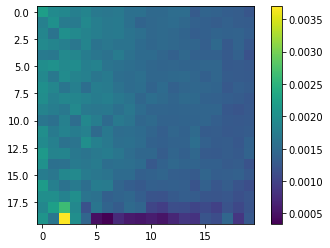

In [17]:
plt.imshow(np.flipud(P_events))
plt.colorbar()

# exploring that bright yellow box hmmmm 800x800x10

### Load from previously compiles .npz stacks of N_cells, N_events, P_events

In [6]:
radius, t_range, num_bins = 800, 800, 10

In [7]:
### load npz
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/canon_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins)) as data:
    N_cells = data['arr_0']
    N_events = data['arr_1']
    P_events = data['arr_2']
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/control_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins)) as data:
    N_cells_c = data['arr_0']
    N_events_c = data['arr_1']
    P_events_c = data['arr_2']
N_c = 10491
N = 1839
limit_c = np.amax(P_events_c)
limit = np.amax(P_events)
cbar_lim = tuple((0, max(limit_c, limit)))

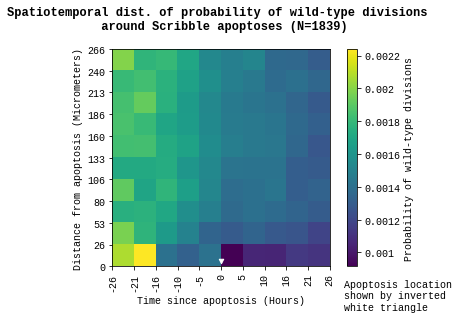

In [8]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

In [9]:
P_events[0,1] 

0.002240843314554435

In [10]:
P_events[0,:]

array([0.00207791, 0.00224084, 0.00141168, 0.00132865, 0.00141313,
       0.00091527, 0.00105961, 0.00105217, 0.00113566, 0.00111346])

In [13]:
N_cells[0,:]

array([ 39944.,  63369.,  98464., 144508., 222201., 407531., 381274.,
       346902., 308191., 246079.])

In [14]:
N_events[0,:]

array([ 83., 142., 139., 192., 314., 373., 404., 365., 350., 274.])

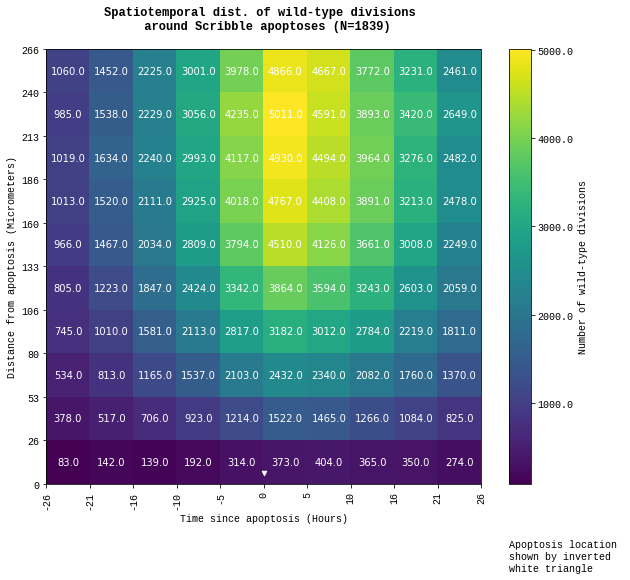

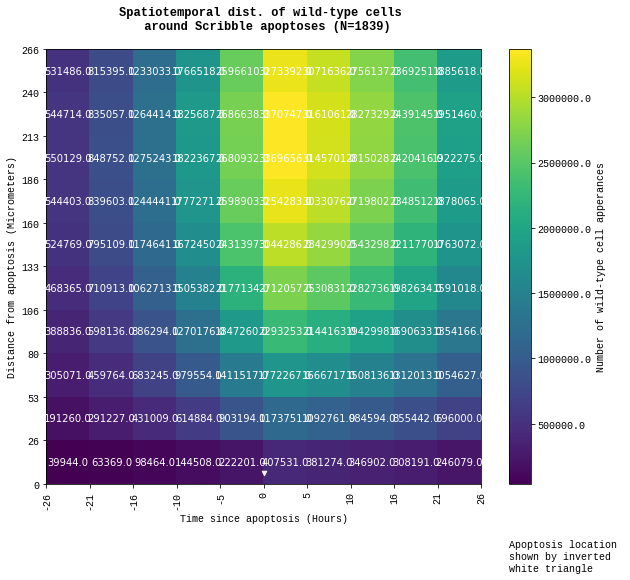

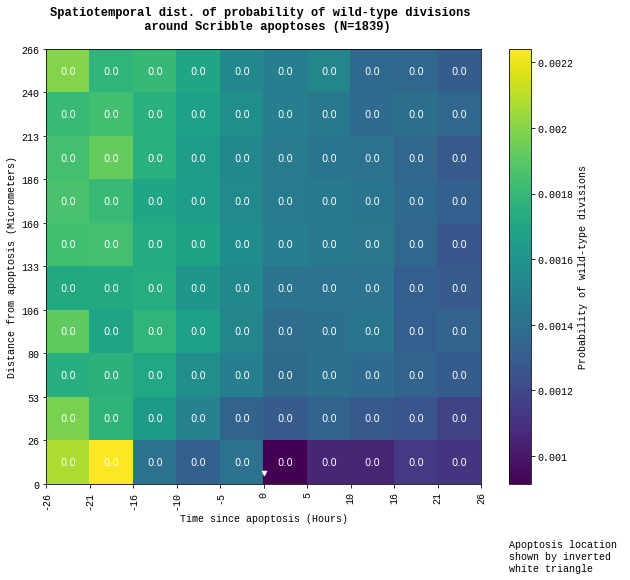

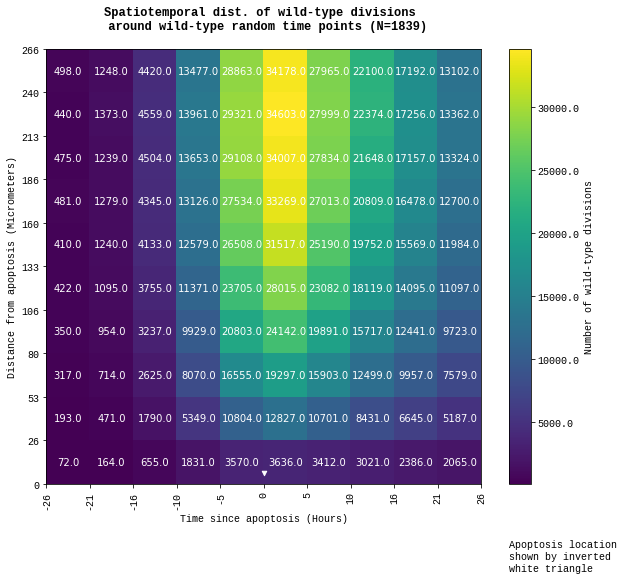

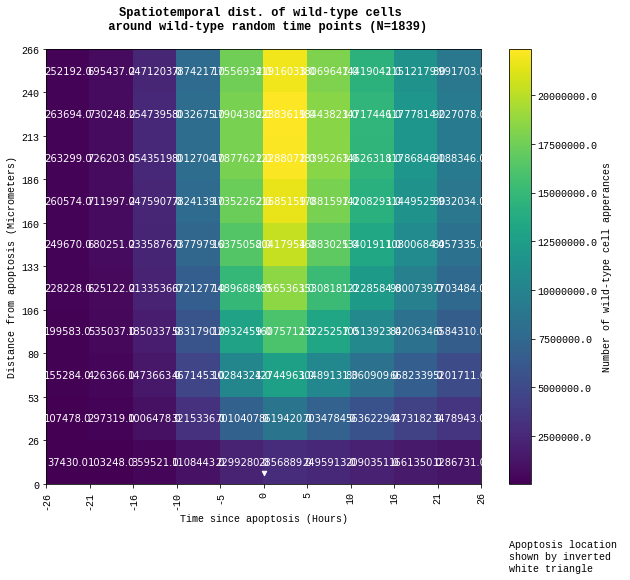

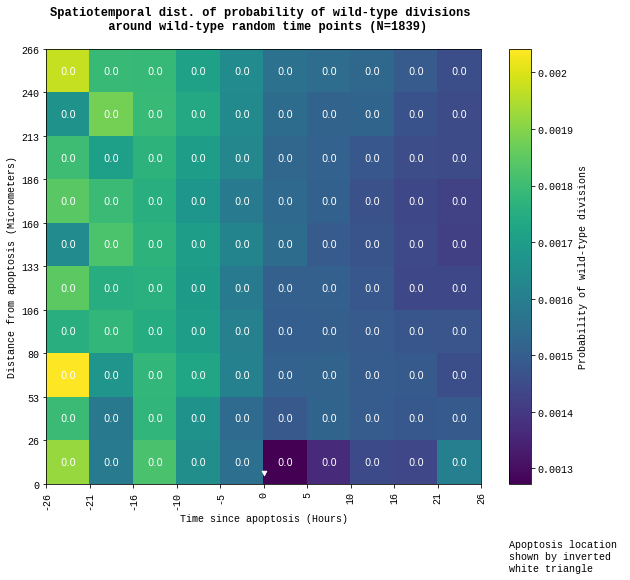

In [40]:
plt.figure(figsize=(10,8))
# plt.imshow(np.flipud(N_events))#,  cmap='PiYG', interpolation='nearest')#,vmin=0, vmax=1)
# plt.colorbar()
render.auto_plot_cumulative(N_events,
                     'N_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(N_events)):
    for j in range(len(N_events)):
        text = plt.text(j, i, (np.flipud(N_events)[i, j]),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/scr_apop_wt_div/N_events.pdf')
plt.figure(figsize=(10,8))
# plt.imshow(np.flipud(N_events))#,  cmap='PiYG', interpolation='nearest')#,vmin=0, vmax=1)
# plt.colorbar()
render.auto_plot_cumulative(N_cells,
                     'N_cells',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                        '',
                        '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(N_cells)):
    for j in range(len(N_cells)):
        text = plt.text(j, i, (np.flipud(N_cells)[i, j]),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/scr_apop_wt_div/N_cells.pdf')
plt.figure(figsize=(10,8))
# plt.imshow(np.flipud(N_events))#,  cmap='PiYG', interpolation='nearest')#,vmin=0, vmax=1)
# plt.colorbar()
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                        '',
                        '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(P_events)):
    for j in range(len(P_events)):
        text = plt.text(j, i, round(np.flipud(P_events)[i, j],2),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/scr_apop_wt_div/P_events.pdf')
plt.figure(figsize=(10,8))


#### control####
render.auto_plot_cumulative(N_events_c,
                     'N_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'wt', 
                      'control', 
                      'wt', 
                      'div', 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(N_events_c)):
    for j in range(len(N_events_c)):
        text = plt.text(j, i, (np.flipud(N_events_c)[i, j]),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/wt_control_wt_div/N_events.pdf')
plt.figure(figsize=(10,8))
# plt.imshow(np.flipud(N_events))#,  cmap='PiYG', interpolation='nearest')#,vmin=0, vmax=1)
# plt.colorbar()
render.auto_plot_cumulative(N_cells_c,
                     'N_cells',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'wt', 
                      'control', 
                      'wt', 
                      'div', 
                        '',
                        '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(N_cells_c)):
    for j in range(len(N_cells_c)):
        text = plt.text(j, i, (np.flipud(N_cells_c)[i, j]),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/wt_control_wt_div/N_cells.pdf')
plt.figure(figsize=(10,8))
# plt.imshow(np.flipud(N_events))#,  cmap='PiYG', interpolation='nearest')#,vmin=0, vmax=1)
# plt.colorbar()
render.auto_plot_cumulative(P_events_c,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'wt', 
                      'control', 
                      'wt', 
                      'div',  
                        '',
                        '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(P_events_c)):
    for j in range(len(P_events_c)):
        text = plt.text(j, i, round(np.flipud(P_events_c)[i, j],2),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/wt_control_wt_div/P_events.pdf')

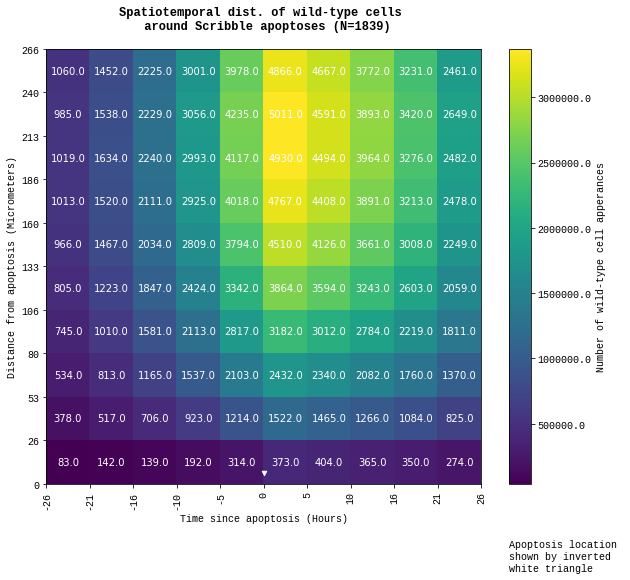

In [38]:
plt.figure(figsize=(10,8))
# plt.imshow(np.flipud(N_events))#,  cmap='PiYG', interpolation='nearest')#,vmin=0, vmax=1)
# plt.colorbar()
render.auto_plot_cumulative(N_cells,
                     'N_cells',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                        '',
                        '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)
for i in range(len(N_events)):
    for j in range(len(N_events)):
        text = plt.text(j, i, (np.flipud(N_events)[i, j]),
                       ha="center", va="center", color="w")
plt.savefig('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/labelled/scr_apop_wt_div/N_cells.pdf')

# exploring that bright yellow box hmmmm - no notable points of interest for this graph 400x400x10

# what if i simulate the N_events being counted the same as N_cells - nothing

### Load from previously compiles .npz stacks of N_cells, N_events, P_events

In [41]:
radius, t_range, num_bins = 400, 400, 10

In [49]:
### load npz
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/canon_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins)) as data:
    N_cells = data['arr_0']
    N_events = data['arr_1']
    P_events = data['arr_2']
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/control_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins)) as data:
    N_cells_c = data['arr_0']
    N_events_c = data['arr_1']
    P_events_c = data['arr_2']
N_c = 10491
N = 1839
limit_c = np.amax(P_events_c)
limit = np.amax(P_events)
cbar_lim = tuple((0, max(limit_c, limit)))

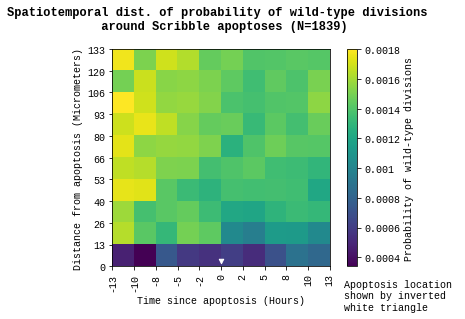

In [50]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

In [51]:
N_events = N_events *20
P_events = N_events/N_cells

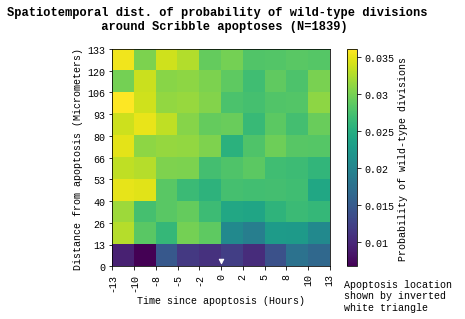

In [52]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      'Scr', 
                      'apop', 
                      'wt', 
                      'div', 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)